In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

In [ ]:
nome = '../../malhasMSH/unidimensional_100T_dif_py.msh'
#nome = '../../malhasMSH/unidimensional_4e_py.msh'

noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]
#noh_eletrodos = [0,  1, 2, 3, 4]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura2D = 0.001)
MinhaMalha1D.ReadMesh()


meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

sigma_inicial = np.full(MinhaMalha1D.NumberOfElements, 0.50)          # Monta vetor sigma inicia

amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui

fwd.Solve()

#plt.plot(fwd.Vmedido)
print(f'Vmedido \n {fwd.Vmedido.shape}')
nome_arquivo = 'unidimensional_100e_py'

N_padraoCC = 1

##fwd.criar_arquivo_pos_2D(N_padraoCC, fwd.Vmedido, nome_arquivo)
#fwd.criar_arquivo_pos_2D(fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)


V_measured = fwd.Vmedido_eletrodos
invProblem = inverseProblem.inverse_problem(MinhaMalha1D, Pcorrente=Pcorrente, debug=1)
invProblem.solve(sigma_inicial, V_measured)
#print('Y_jacobian',invProblem.Y_jacobian)

In [ ]:
invProblem.Y_Vcalc

## Testes com HUA

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
#nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'

#MinhaMalha = mesh.HuaElectrodes2DMeshEdson(8, nome_msh=nome, altura2D = 0.02)
MinhaMalha = mesh.HuaElectrodes2DMeshEdson(2, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 0.1,    
#1001 : 0.01,
5001 : 0.2, 
5002 : 0.2, 
#5003 : 0.2, 
#5004 : 0.2, 
#5005 : 0.2, 
#5006 : 0.2, 
#5007 : 0.2, 
#5008 : 0.2,  
}

MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=0, VirtualNode = True)   # __init__ roda aqui


print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ8_anom4_tst_Hua_v4_1_lc_0_01'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

V_measured = fwd.Vmedido_eletrodos

print(f'V_mesured \n {V_measured}')


invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalha, Pcorrente=fwd.corrente)
invProblem_2D.solve(V_measured, initialEstimate=2.9,alpha =2.5,  Lambda = 0.50, max_iter=1,Tol=5.0e-4)
#print('Y_jacobian',invProblem.Y_jacobian)


# TESTE COM eletrodo pontual

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ16_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

# TESTE com eletrodo pontual mesh 4 elementos

## Regularização Filtro Gaussiano FP_Alta

fonte: Erick equação C.37

$$
\hat{\theta}_{k+1} = \hat{\theta}_k + \alpha_k
\left( J_k^T W_1 J_k + \lambda^2 L_2^T L_2 \right)^{-1}
\cdot \left( J_k^T W_1 (z - h(\hat{\theta}_k)) - \lambda^2 L_2^T L_2 (\hat{\theta}_k - \theta^*) \right)
$$
onde,
$$W_1=L_1^T L_1$$

In [ ]:
# %%time
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

###############################################################################
#nome = '../../malhasMSH/quatro_triangulos_03nov2025.msh'
#nome = '../../malhasMSH/circ16_3_anomalia6_v2208.msh'
nome = '../../malhasMSH/dezesseis_triangulos_22jan25.msh'
#nome = '../../malhasMSH/circ16_3_anomalia6_coarse_v2208.msh'


MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto2.ReadMesh() 

#print(MinhaMalhaPto2.Elements[2])
#print(f"Centroid: {MinhaMalhaPto2.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaPto2.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial
#PcorrenteReal = np.loadtxt("padraoCC_3objetos.txt")


meus_sigmas = {
1000 : 3.0,   
1001 : 2.0}#,
#1002 : 2.0,
#1003 : 2.0}


MinhaMalhaPto2.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto2.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaPto2.KGlobal.shape}')

#fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=PcorrenteReal, SkipPattern=None, I =1.0e-3)   # __init__ roda aqui
fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=None, SkipPattern=0, I =1.0e-3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
#print(f'Pcorrente \n {fwd.corrente[:16]}')

#print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
#print(f'Vmedido \n {fwd.Vmedido[:,0]}')

#nome_arquivo = 'ParaVernoGmshPto'
nome_arquivo = 'banana'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

#print(f'self.Yinversa banana\n {fwd.Yinversa}')

V_measured = fwd.Vmedido_eletrodos


print(f'V_mesured \n {V_measured.shape}')

Reading ../../malhasMSH/quatro_base_22jan25.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 1000].
Physical tags found: [1000].
Physical tags points: [10000 10001 10002 10003 10004]
4 electrodes found.
MSH file with 4 elements and 5 nodes.
ElectrodeNodes: [0 1 2 3]
GndNode: 4
 SigmaTemp [[2.]
 [2.]
 [2.]
 [2.]]
 no_i = 0
 self.Elements.KGeo [[ 0.01  0.   -0.01]
 [ 0.    0.01 -0.01]
 [-0.01 -0.01  0.02]]
 valorTemp 
 [0.02]
 self.Elements.KGeo [[ 0.01  0.   -0.01]
 [ 0.    0.01 -0.01]
 [-0.01 -0.01  0.02]]
 valorTemp 
 [0.]
 self.Elements.KGeo [[ 0.01  0.   -0.01]
 [ 0.    0.01 -0.01]
 [-0.01 -0.01  0.02]]
 valorTemp 
 [-0.02]
 no_i = 1
 self.Elements.KGeo [[ 0.01  0.   -0.01]
 [ 0.    0.01 -0.01]
 [-0.01 -0.01  0.02]]
 valorTemp 
 [0.]
 self.Elements.KGeo [[ 0.01  0.   -0.01]
 [ 0.    0.01 -0.01]
 [-0.01 -0.01  0.02]]
 valorTemp 
 [0.02]
 self.Elements.KGeo [[ 0.01  0.   -0.01]
 [ 0.    0.01 -0.01]
 [-0.01 -0.01  0.02]]
 valorTemp 
 [-0.02]
 no_i = 4
 self.Elements.KGe

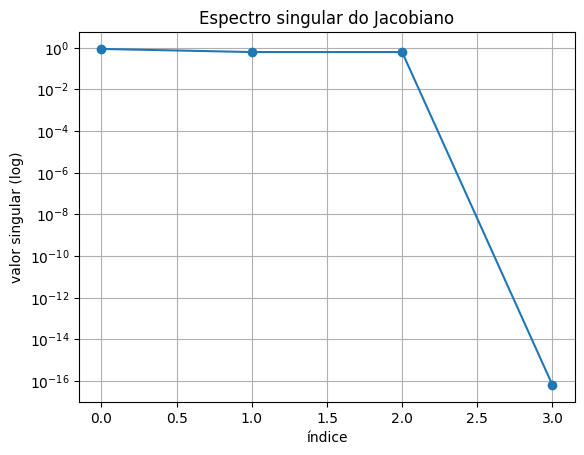

rank efetivo ~ 3 (tol=8.83883e-07)


In [3]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt


#######################################################
#nome = '../../malhasMSH/circ16_base_coarse.msh'
nome = '../../malhasMSH/quatro_base_22jan25.msh'
#nome = '../../malhasMSH/circ16_base_v2208.msh'
#nome = '../../malhasMSH/circ16_3_anomalia6_coarse_v2208.msh'

#nome = '../../malhasMSH/circ16_3_anomalia6_v2208.msh'

MinhaMalhaBase16 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaBase16.ReadMesh() 

#meus_sigmas = {1000 : 1.0}
meus_sigmas = {
1000 : 2.0,   
1001 : 2.0}#,
#1002 : 1.0,
#1003 : 1.0}

MinhaMalhaBase16.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaBase16.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaBase16.KGlobal.shape}')
#PcorrenteBase = np.loadtxt("padrao128CC_392.txt")
fwd = forwardProblem.forward_problem(MinhaMalhaBase16, Pcorrente=None, SkipPattern=0, I =1.0e-3)   # __init__ roda aqui


#print(MinhaMalhaBase16.Elements[2])
#print(f"Centroid: {MinhaMalhaBase16.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaBase16.Elements[2].KGeo}")


#iteration= np.loadtxt("lastIteration.txt")
iteration=0

#sigma_inicial_rnd = np.random.uniform(2.6, 2.9, MinhaMalhaBase16.NumberOfElements)
#print('x0', sigma_inicial_rnd)


#sigma_inicial_cont = np.loadtxt("sigma_inicial_cont.txt")
invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaBase16, Pcorrente=fwd.corrente)
#invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaBase16, Pcorrente=PcorrenteBase)


#invProblem_2D.solve(V_measured,initialEstimate=sigma_inicial_rnd, alpha =0.1,  Lambda = 0.50, max_iter=3, Tol=1.0e-20, iteration=iteration)
invProblem_2D.solve(V_measured,initialEstimate=2.0, alpha =0.2500,  Lambda = 1.0e-3, max_iter=2, Tol=1.0e-2, iteration=iteration)
#print('Y_jacobian',invProblem.Y_jacobian)